In [168]:
from project_functions import load_data, preprocess_data, split_data, train_model, evaluate_model, balance_data, plot_feature_importances, plot_correlation_matrix, tune_model, make_predictions

In [169]:
# Loading the dataset
df = load_data('../data/raw/Sleep_health_and_lifestyle_dataset.csv')

In [170]:
# Preprocessing the data
df_encoded = preprocess_data(df)

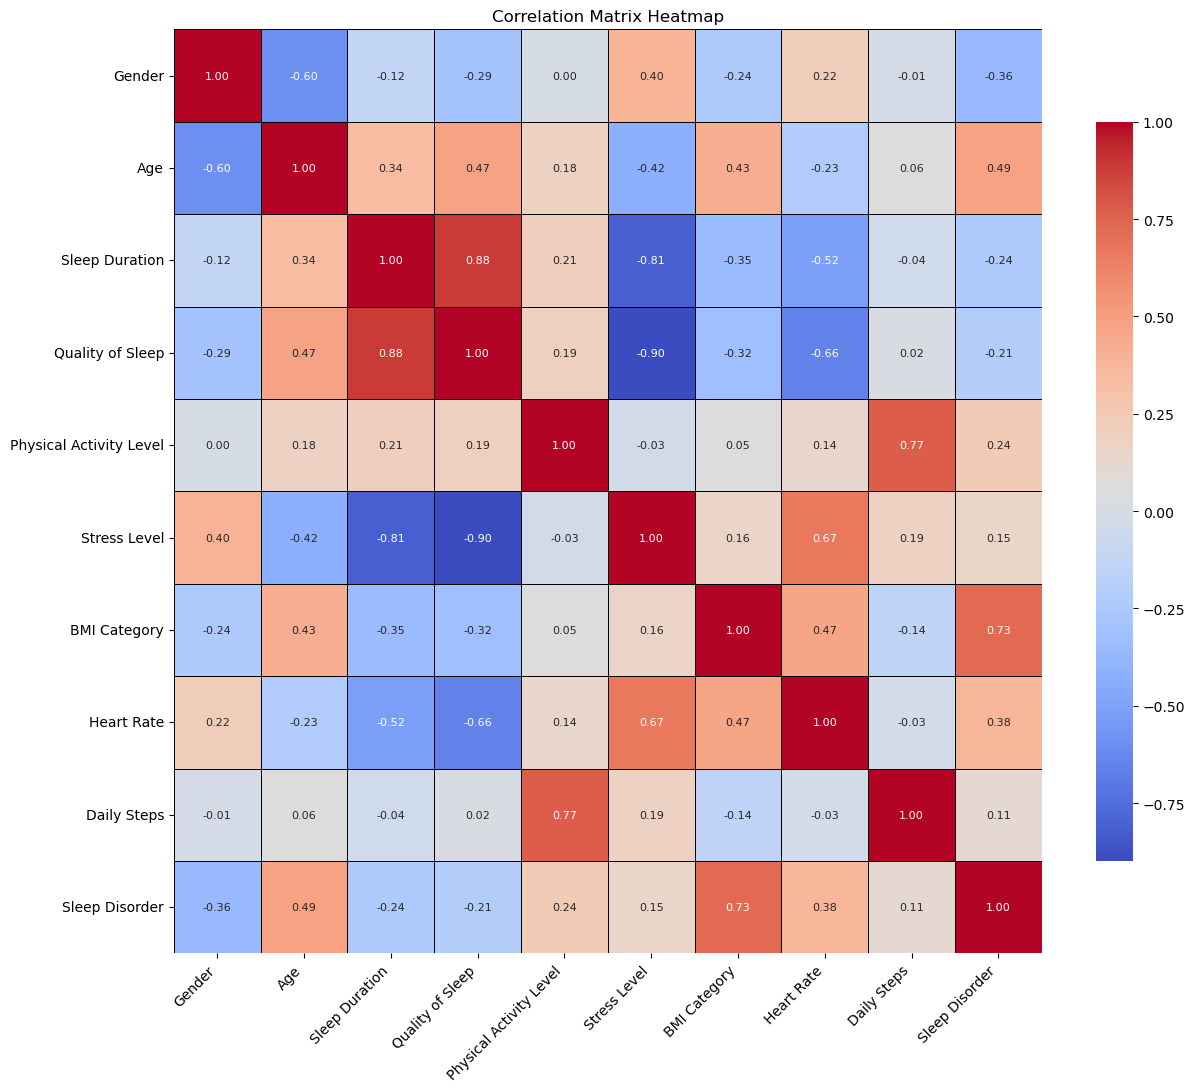

In [171]:
# Plotting correlation matrix
plot_correlation_matrix(df_encoded)

In [172]:
# Splitting the data
X_train, X_test, y_train, y_test = split_data(df_encoded)

In [173]:
# Balancing the data
X_train_balanced, y_train_balanced = balance_data(X_train, y_train)

In [174]:
# Training the model
gbr = train_model(X_train_balanced, y_train_balanced)

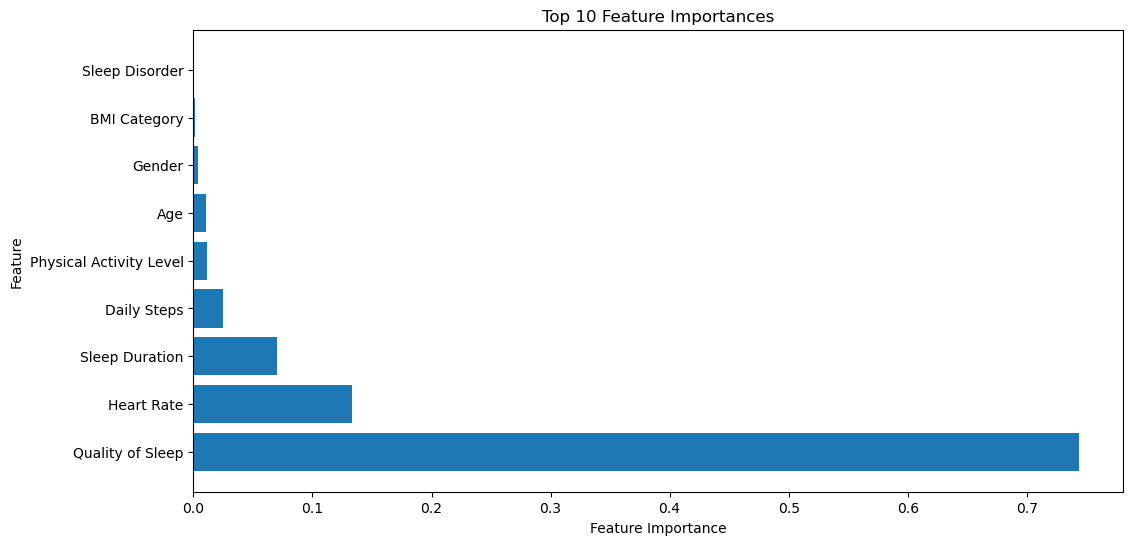

In [175]:
# Plotting feature importances
plot_feature_importances(gbr, X_train_balanced)

In [176]:
# Evaluating the model
rmse, mae, r2 = evaluate_model(gbr, X_test, y_test)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")

Root Mean Squared Error (RMSE): 0.15081658881619991
Mean Absolute Error (MAE): 0.04499541017242721
R-squared (R^2): 0.9927196856450086


In [177]:
# Tuning the model
best_gbr = tune_model(X_train_balanced, y_train_balanced)

Best parameters found:  {'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.7000000000000001}


In [178]:
# Evaluating the tuned model
rmse, mae, r2 = evaluate_model(best_gbr, X_test, y_test)
print(f"Tuned Model - Root Mean Squared Error (RMSE): {rmse}")
print(f"Tuned Model - Mean Absolute Error (MAE): {mae}")
print(f"Tuned Model - R-squared (R^2): {r2}")

Tuned Model - Root Mean Squared Error (RMSE): 0.2767340592637267
Tuned Model - Mean Absolute Error (MAE): 0.05843762693368182
Tuned Model - R-squared (R^2): 0.975488091213966


In [179]:
# Data example for making predictions
nuevos_datos = pd.DataFrame({
    'Gender': [1],
    'Age': [30],
    'Sleep Duration': [8.0],
    'Quality of Sleep': [2.0],
    'Physical Activity Level': [0],
    'BMI Category': [1],
    'Heart Rate': [110],
    'Daily Steps': [8000],
    'Sleep Disorder': [1]
})

# Ensure that the input data has the same columns as the training set
nuevos_datos = nuevos_datos[X_train.columns]

# Making predictions
predictions = make_predictions(best_gbr, nuevos_datos)

print(f"Predictions: {predictions.round(1)}")


Predictions: [4.7]
